<a href="https://colab.research.google.com/github/vishwa-vibhi/Machine_Learning/blob/main/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train - MSE: 0.3445174376072585, RMSE: 0.5869560780903955, MAPE: 24193396981919.477, R2: 0.748358647720669
Test - MSE: 1.834998104644054, RMSE: 1.3546210188255805, MAPE: 12819173072044.688, R2: -0.33316706454017453
Silhouette Score: 0.09997725181257422
Calinski-Harabasz Score: 105.98563379659078
Davies-Bouldin Index: 2.563729128055641


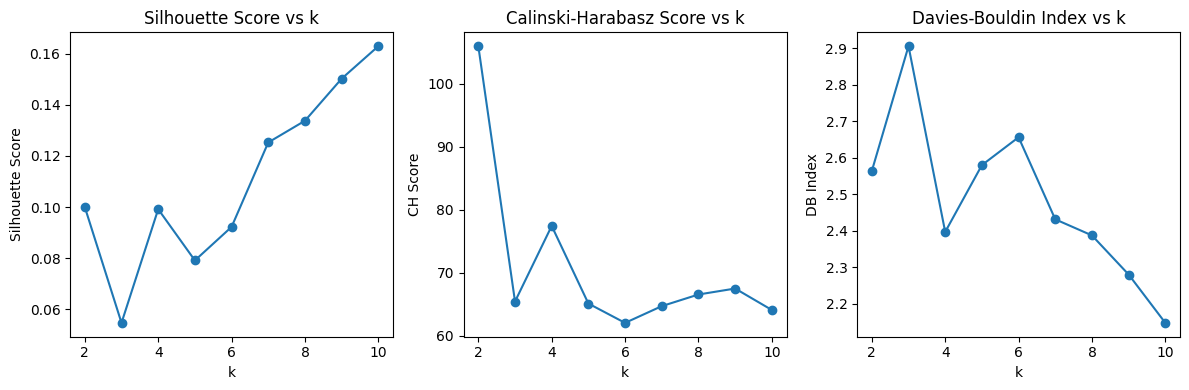

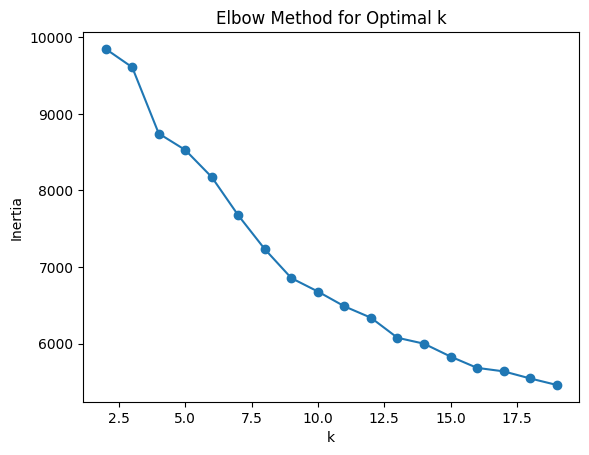

optimal value of k 13


In [9]:

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_squared_error, mean_absolute_percentage_error, r2_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/ML/training_mathbert.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A1: Train Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)

# A2: Evaluate Regression Model
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

def evaluate_regression(y_true, y_pred, dataset_type):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_type} - MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")

evaluate_regression(y_train, y_train_pred, "Train")
evaluate_regression(y_test, y_test_pred, "Test")

# A4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
labels = kmeans.labels_

# A5: Compute Clustering Scores
sil_score = silhouette_score(X_train, labels)
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print(f"Silhouette Score: {sil_score}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")

# A6: Vary k and Evaluate Clustering Metrics
k_values = range(2, 11)
sil_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score vs k")
plt.xlabel("k")
plt.ylabel("CH Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("k")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()

# A7: Elbow Plot for Optimal k
distortions = []
k_range = range(2, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()
!pip install kneed
from kneed import KneeLocator

knee_locator = KneeLocator(k_range, distortions, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow
print("optimal value of k",optimal_k)



Train - MSE: 0.3445174376072585, RMSE: 0.5869560780903955, MAPE: 24193396981919.477, R2: 0.748358647720669
Test - MSE: 1.834998104644054, RMSE: 1.3546210188255805, MAPE: 12819173072044.688, R2: -0.33316706454017453
Silhouette Score: 0.09997725181257422
Calinski-Harabasz Score: 105.98563379659078
Davies-Bouldin Index: 2.563729128055641


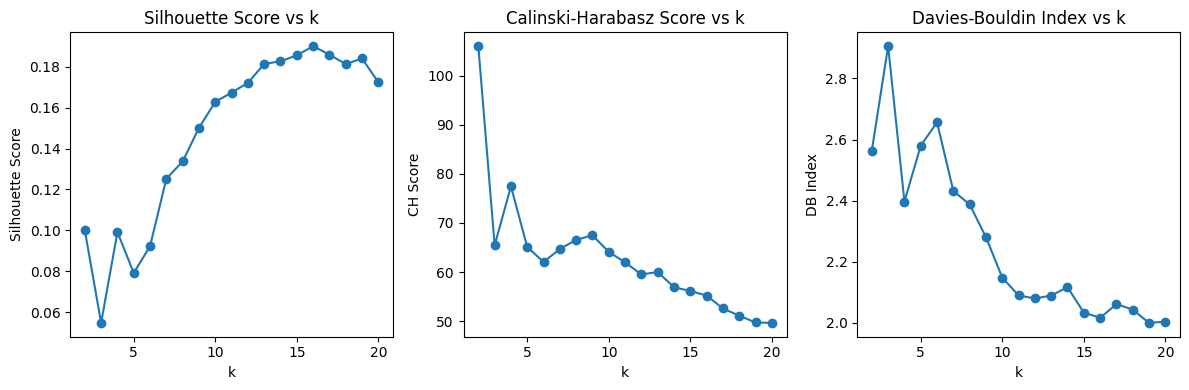

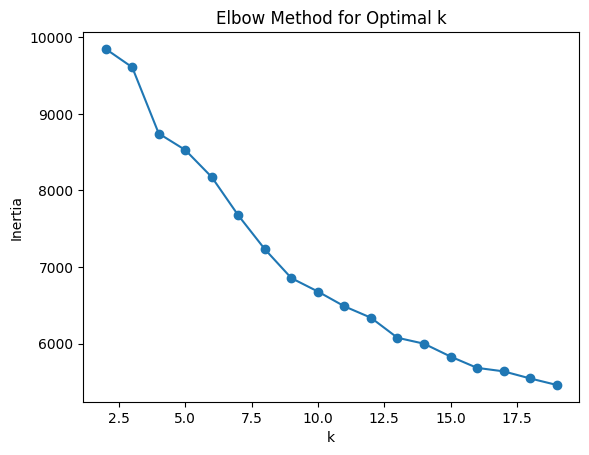

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_squared_error, mean_absolute_percentage_error, r2_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/ML/training_mathbert.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A1: Train Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)

# A2: Evaluate Regression Model
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

def evaluate_regression(y_true, y_pred, dataset_type):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_type} - MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")

evaluate_regression(y_train, y_train_pred, "Train")
evaluate_regression(y_test, y_test_pred, "Test")

# A4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
labels = kmeans.labels_

# A5: Compute Clustering Scores
sil_score = silhouette_score(X_train, labels)
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)
print(f"Silhouette Score: {sil_score}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")

# A6: Vary k and Evaluate Clustering Metrics
k_values = range(2, 21)
sil_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score vs k")
plt.xlabel("k")
plt.ylabel("CH Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("k")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()

# A7: Elbow Plot for Optimal k
distortions = []
k_range = range(2, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()
